# Assignment 5 - Statistics

**Due Wednesday, Nov 25 2020 @ 11:55 pm**

<p style="color:red;"><strong>Show all work, add comments and docstrings!!!</strong></p>

The table below presents spot speeds collected at a section of highway located
in a residential area before and after an increase in speed enforcement activities. Using the student’s t test, determine whether there was a statistically significant difference in the average speeds at a significance level of α = 0.05 (the 95% confidence level). Also report, for both the before and after cases, the mean speed, standard deviation, 85th percentile speed, and percentage of traffic exceeding the posted speed limit of 30 mi/h.


In addition, draw the histogram frequency distribution and cumulative percentage distribution for each set of data and determine (a) average speed, (b) 85th-percentile speed, (c) 15th-percentile speed, (d) mode, (e) median, and (f) pace.


| Before | After
|:---:|:---:|
| 40 | 23 |
| 35 | 33 |
| 38 | 25 |
| 37 | 36 |
| 33 | 37 |
| 30 | 34 |
| 28 | 23 |
| 35 | 28 |
| 35 | 24 |
| 40 | 31 |
| 33 | 24 |
| 35 | 20 |
| 36 | 21 |
| 36 | 28 |
| 40 | 35 |
| 38 | 25 |
| 35 | 21 |
| 30 | 35 |
| 30 | 30 |
| 38 | 33 |
| 39 | 21 |
| 35 | 28 |
| 36 | 23 |
| 34 | 24 |
| 33 | 27 |
| 31 | 20 |
| 36 | 20 |
| 35 | 30 |
| 33 | 32 |
| 39 | 33 |


Once again, **show all work!!!** I expect a *Pythonic* solution taking advantage of popular external libraries, not just a series of semi-manual calculations. Remember, the biggest advantage with Python is the ability to generalize and write a program that given a different dataset would still produce results with minimal-to-no code change. Fill in your code below. Good luck!

---

# Set Up

In [266]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import math
import statistics as st
import matplotlib.pyplot as plt

# Inline Plots
%matplotlib inline

# For High-Res Plots
%config InlineBackend.figure_formats = ['svg']

In [267]:
td = pd.read_csv('hw5 traffic data.csv')

In [268]:
td

,Before,After
0,40,23
1,35,33
2,38,25
3,37,36
4,33,37
5,30,34
6,28,23
7,35,28
8,35,24
9,40,31


In [269]:
before_sp = td['Before'].values
after_sp = td['After'].values

In [270]:
before_sp

array([40, 35, 38, 37, 33, 30, 28, 35, 35, 40, 33, 35, 36, 36, 40, 38, 35,
       30, 30, 38, 39, 35, 36, 34, 33, 31, 36, 35, 33, 39])

In [271]:
after_sp

array([23, 33, 25, 36, 37, 34, 23, 28, 24, 31, 24, 20, 21, 28, 35, 25, 21,
       35, 30, 33, 21, 28, 23, 24, 27, 20, 20, 30, 32, 33])

# Statistics

#### Mean

In [272]:
def sp_stats(values):
  return stats.describe(values)

In [273]:
bf_mn = sp_stats(before_sp).mean
bf_mn

35.1

In [274]:
af_mn = sp_stats(after_sp).mean
af_mn

27.466666666666665

#### Standard Deviation

In [275]:
def std(values):
  return np.std(values, ddof=1)

In [276]:
bf_sd = np.std(before_sp)
bf_sd

3.155418619877031

In [277]:
af_sd = np.std(after_sp)
af_sd

5.352465683111746

#### (85th) Percentile Speed

In [278]:
def pct_sp(values, pctl):
  return np.percentile(values, pctl)

In [279]:
bf_85 = pct_sp(before_sp, [85])
bf_85

array([38.65])

In [280]:
af_85 = pct_sp(after_sp, [85])
af_85

array([33.65])

#### Percentage of Traffic Exceeding Speed Limit of 30 MPH

In [281]:
def above_sp_lim(values, sp_lim):
  count = 0
  amt_values = len(values)
  for value in values:
    if value > sp_lim:
      count += 1
  return (count / amt_values) * 100

In [282]:
bf_30 = above_sp_lim(before_sp, 30)
bf_30

86.66666666666667

In [283]:
af_30 = above_sp_lim(after_sp, 30)
af_30

33.33333333333333

#### Statistics Summary

In [284]:
# Compilation of Stats

def stats_sum(values, pct, splimit):
  stat_list = [sp_stats(values).mean, std(values), pct_sp(values, pct)[0], above_sp_lim(values, splimit)]
  # stat_list.append(sp_stats(values).mean)
  # stat_list.append(std(values))
  # stat_list.append(pct_85(values)[0])
  # stat_list.append(above_30(values))
  return stat_list

In [285]:
before = stats_sum(before_sp, [85], 30)
before

[35.1, 3.209361307176242, 38.65, 86.66666666666667]

In [286]:
after = stats_sum(after_sp, [85], 30)
after

[27.466666666666665, 5.443967451151357, 33.65, 33.33333333333333]

In [287]:
# Statistics Summary Table

stats_summary = pd.DataFrame({"Before": before, "After": after})
stats_summary.index = ["Mean (MPH)", "Standard Deviation (MPH)", "85th Percentile (MPH)", "Percent Exceeding 30 MPH (%)"]
stats_summary

,Before,After
Mean (MPH),35.100000,27.466667
Standard Deviation (MPH),3.209361,5.443967
85th Percentile (MPH),38.650000,33.650000
Percent Exceeding 30 MPH (%),86.666667,33.333333


# Plots and Graphs

In [288]:
# Finding minimum and maximum values in combined dataset to determine plot x-axis boundaries
def abs_minmax():
  speeds = np.concatenate((before_sp, after_sp))
  absmin = min(speeds)
  absmax = max(speeds)
  return [absmin, absmax]

global_mm = abs_minmax()
global_mm

[20, 40]

In [289]:
abs_min = global_mm[0]
abs_min

20

In [290]:
abs_max = global_mm[1]
abs_max

40

#### Histogram Frequency Distribution

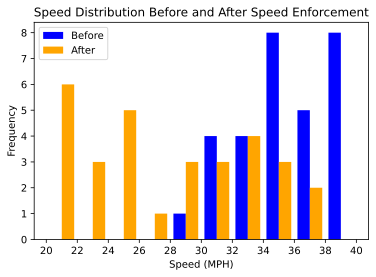

In [291]:
'''I put both sets of data into one graph for better comparison.
'''
plt.hist((before_sp, after_sp), color=['blue', 'orange'], label = ['Before', 'After'], bins=10)
plt.title(label = 'Speed Distribution Before and After Speed Enforcement')
plt.xlabel(xlabel = 'Speed (MPH)')
plt.xticks(np.arange(abs_min, abs_max + 1, 2.0))
plt.ylabel(ylabel = 'Frequency')
plt.legend()
plt.show()

#### Cumulative Percentage Distribution

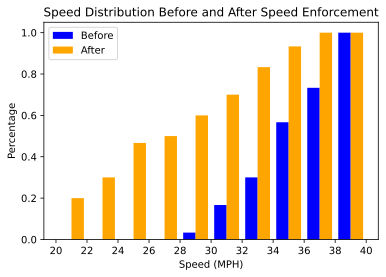

In [292]:
'''I put both sets of data into one graph for better comparison.
'''
plt.hist((before_sp, after_sp), cumulative=1, density=True, color=['blue', 'orange'], label = ['Before', 'After'], bins=10)
plt.title(label = 'Speed Distribution Before and After Speed Enforcement')
plt.xlabel(xlabel = 'Speed (MPH)')
plt.xticks(np.arange(abs_min, abs_max + 1, 2.0))
plt.ylabel(ylabel = 'Percentage')
plt.legend()
plt.show()

#### Pace

* 10-mph increment in which highest percentage of speeds is observed

http://www.ce.memphis.edu/4162/L6_Speed_Studies.pdf
http://54.172.27.91/transportation/speed/SBRY_WestShoreRd_SpeedLimitStudy_20140912.pdf

It was unclear to me as to what exactly were the mathematical bounds of the 10-mph increment. There were four possibilities: (x, y), (x, y], [x, y), and [x, y]. The first option would have a range of 9, while the last option would have a range of 11. From the middle two options,  the former was chosen, almost arbitrarily, but also because it better reflects natural counting. If the third option was chosen, the results would have been slightly different. Instead of 30-40 and 20-30, the results would have been 31-41 and 21-31.


In [293]:
def pace_int(values):
  ran = range(abs_min - 1, abs_max + 1)
  cnt = []
  for i in ran:
    upper = i + 10
    in_int = len([1 for j in values if j <= upper]) - len([1 for j in values if j < i])
    cnt.append(in_int)
  add_amt = cnt.index(max(cnt))
  lim = [abs_min - 1 + add_amt, abs_min + 9 + add_amt]
  return lim

In [294]:
bf_pace = pace_int(before_sp)
bf_pace

[30, 40]

In [295]:
af_pace = pace_int(after_sp)
af_pace

[20, 30]

#### Mode Breaker

In [296]:
'''It was noticed that for the 'after' data set, there is no mode. In situations 
for which there are multiple modes, I have seen either the lowest or highest of 
those modes displayed as the mode representative when other libraries are used. 
I opted for the neutral option: for situations in which there are multiple modes, 
'N/A' is returned.
'''

def mode_breaker(values):
  '''If StatisticsError is raised, it is replaced with 'N/A.' In other words, if 
  StatisticsError is raised, the function 'breaks' through the error to return a
  more useful output.
  '''
  try:
    md = st.mode(values)
    return md
  except st.StatisticsError:
    md = 'N/A'
    return md

#### Before Speeds Scatter Plot

In [297]:
# Statistics Values Not Found Above
# In Order: 15th Percentile, Mode, Median

bf_15 = pct_sp(before_sp, [15])
bf_mode = mode_breaker(before_sp)
bf_med = st.median(before_sp)

print(bf_15)
print(bf_mode)
print(bf_med)

[31.7]
35
35.0


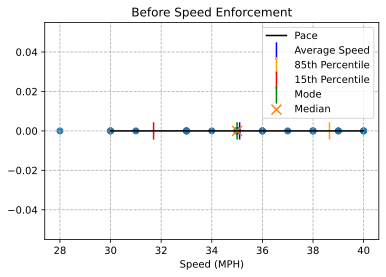

The mode and median are the same value.


'I could probably optimize my code further so that the preceding message appears \nif all the statistical values (mean, median, mode, 15th, 85th) are checked and \ntwo or more are found to be the same.\n'

In [298]:
y_zero = 0, 0

plt.scatter(before_sp, [0 for value in before_sp])
plt.plot(bf_pace, y_zero, color='black', label='Pace')
plt.scatter(bf_mn, [0], marker='|', s=300, c='blue', label='Average Speed')
plt.scatter(bf_85, [0], marker='|', s=300, c='orange', label='85th Percentile')
plt.scatter(bf_15, [0], marker='|', s=300, c='red', label='15th Percentile')
plt.scatter(bf_mode, [0], marker='|', s=300, c='green', label='Mode')
plt.scatter(bf_med, [0], marker='x', s=100, label='Median')

plt.title(label = 'Before Speed Enforcement')
plt.xlabel(xlabel = 'Speed (MPH)')
plt.grid(ls='--')
plt.legend()
plt.show()

print('The mode and median are the same value.')
'''I could probably optimize my code further so that the preceding message appears 
if all the statistical values (mean, median, mode, 15th, 85th) are checked and 
two or more are found to be the same.
'''

#### After Speeds Scatter Plot

In [299]:
# Statistics Values Not Found Above
# In Order: 15th Percentile, Mode, Median

af_15 = pct_sp(after_sp, [15])
af_mode = mode_breaker(after_sp)
'''StatisticsError: no unique mode; found 6 equally common values'''
af_med = st.median(after_sp)

print(af_15)
print(af_mode)
print(af_med)

[21.]
N/A
27.5


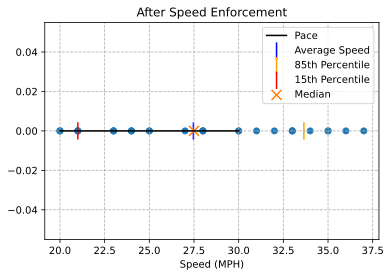

There is no unique mode; rather, there are 6 equally common values.


In [300]:
y_zero = 0, 0

plt.scatter(after_sp, [0 for value in after_sp])
plt.plot(af_pace, y_zero, color='black', label='Pace')
plt.scatter(af_mn, [0], marker='|', s=300, c='blue', label='Average Speed')
plt.scatter(af_85, [0], marker='|', s=300, c='orange', label='85th Percentile')
plt.scatter(af_15, [0], marker='|', s=300, c='red', label='15th Percentile')
# plt.scatter(af_mode, [0], marker='|', s=300, c='green', label='Mode')
plt.scatter(af_med, [0], marker='x', s=100, label='Median')

plt.title(label = 'After Speed Enforcement')
plt.xlabel(xlabel = 'Speed (MPH)')
plt.grid(ls='--')
plt.legend()
plt.show()

print('There is no unique mode; rather, there are 6 equally common values.')

# Hypothesis Testing

<u>Null hypothesis</u>: There is no statistically significant difference in the average speeds at a significance level of α = 0.05 (the 95% confidence level).

* Reject null hypothesis: if p/2 < alpha 
and t > 0
<br />
* Accept null hypothesis: if p/2 < alpha and t < 0

In [301]:
ttest_res = sp.stats.ttest_ind(before_sp, after_sp)
ttest_res

Ttest_indResult(statistic=6.6158907241120515, pvalue=1.2908778469303662e-08)

In [302]:
def hyp_test(ttest, alpha):
  if ttest[1] / 2 < alpha:
    if ttest[0] > 0:
      print('The null hypothesis is rejected.')
    else:
      print('The null hypothesis is accepted.')
  else:
    print('A conclusion at the desired confidence level could not be made.')

In [303]:
hyp_test(ttest_res, 0.05)

The null hypothesis is rejected.


#### Conclusion

It can be determined that there was a statistically significant difference in the average speeds at a significance level of α = 0.05.


In [304]:
# Finals Statistics Summary
def final_stats(values, pct1, pct2, splimit):
  stats_fin = [sp_stats(values).mean, mode_breaker(values), st.median(values), std(values), pct_sp(values, pct1)[0], pct_sp(values, pct2)[0], above_sp_lim(values, splimit) * 100, pace_int(values)[0], pace_int(values)[1]]
  return stats_fin

In [305]:
bf_fin = final_stats(before_sp, [15], [85], 30)
bf_fin

[35.1,
 35,
 35.0,
 3.209361307176242,
 31.700000000000003,
 38.65,
 8666.666666666668,
 30,
 40]

In [306]:
af_fin = final_stats(after_sp, [15], [85], 30)
af_fin

[27.466666666666665,
 'N/A',
 27.5,
 5.443967451151357,
 21.0,
 33.65,
 3333.333333333333,
 20,
 30]

In [307]:
# Final Statistics Summary Table

fin_sum = pd.DataFrame({"Before": bf_fin, "After": af_fin})
fin_sum.index = ["Average Speed (MPH)", "Mode (MPH)", "Median (MPH)", "Standard Deviation (MPH)", "15th Percentile (MPH)", "85th Percentile (MPH)", "Percent Exceeding 30 MPH (%)", "Pace - Lower Limit (MPH)", "Pace - Upper Limit (MPH)"]
fin_sum

,Before,After
Average Speed (MPH),35.100000,27.4667
Mode (MPH),35.000000,N/A
Median (MPH),35.000000,27.5
Standard Deviation (MPH),3.209361,5.44397
15th Percentile (MPH),31.700000,21
85th Percentile (MPH),38.650000,33.65
Percent Exceeding 30 MPH (%),8666.666667,3333.33
Pace - Lower Limit (MPH),30.000000,20
Pace - Upper Limit (MPH),40.000000,30
